<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [32]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv("./data/job_listings.csv")
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [14]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [36]:
df['descriptions'] = df['description'].str.replace('\n', '')

In [38]:
def make_soup(html):
    html = html.lstrip('b"\'').rstrip('"\'')
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

In [39]:
df['description_clean'] = df['descriptions'].apply(make_soup)
df.head()

,Unnamed: 0,description,title,descriptions,description_clean
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>...",Job Requirements:\nConceptual understanding in...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,"Job Description\n\nAs a Data Scientist 1, you ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-...","$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Location: USA \xe2\x80\x93 multiple locations\...


In [22]:
#STOP_WORDS = nlp.Defaults.stop_words.union(["coffee","it's", "i'm", "i've", "got", "it", " ", "it.", "place", "this", "  ", "", "   ", "    ", " -", "-", "  -", "s", " s", "s ", " s ", "coffee.", "shop", "come", "don't", "time", "austin", "people", "coffee,", "work", "tea", "iced", "definitely", "drink", "try", "ordered", "you're", "didn't", "&", "know", "want", "came"])

## 2) Use Spacy to tokenize the listings 

In [23]:
nlp = spacy.load("en_core_web_lg")

In [29]:
def tokenize(text):
    tokens = []
    doc = nlp(text.strip())
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            tokens.append(token.text.lower())
    return tokens 

In [40]:
df['description_clean'].apply(tokenize)

0      [job, requirements:\nconceptual, understanding...
1      [job, description\n\nas, data, scientist, 1, h...
2      [data, scientist, working, consulting, busines...
3      [$, 4,969, $, 6,756, monthcontractunder, gener...
4      [location, usa, \xe2\x80\x93, multiple, locati...
                             ...                        
421    [us:\nwant, fantastic, fun, startup, that\xe2\...
422    [internshipat, uber, ignite, opportunity, sett...
423    [$, 200,000, $, 350,000, yeara, million, peopl...
424    [senior, data, scientist\njob, description\n\n...
425    [cerner, intelligence, new, innovative, organi...
Name: description_clean, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [41]:
vect = CountVectorizer(stop_words='english', max_features=1000)
#vect = CountVectorizer(stop_words='english', min_df=2, max_df=.95, ngram_range(1,2))

vect.fit(df['description_clean'])

dtm = vect.transform(df['description_clean'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [43]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [44]:
#boilerplate count func. to help w text
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [45]:
# Use the Function
text_data = count(df['description_clean'])

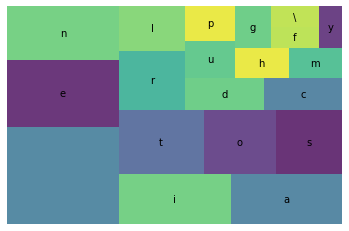

In [47]:
import squarify
text_data_top20 = text_data[text_data['rank'] <= 20]

squarify.plot(sizes=text_data_top20['pct_total'], label=text_data_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 4) Visualize the most common word counts

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [49]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description_clean'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,years relevant,years work,years working,years xe2,yes,york,york city,yrs,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [51]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['description_clean']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,$ 40,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.026648,0.0,0.029098,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.233208,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.133049,0.0,0.145279,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [52]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [53]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.29624578, 1.3018282 , 1.33053148, 1.33510658]]),
 array([[  0, 115, 274, 403, 338]]))

In [54]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[403]])

(array([[0.        , 1.25373899, 1.25373899, 1.26567616, 1.27014985]]),
 array([[403, 315, 207, 325, 285]]))

In [55]:
df['description_clean'][0][:200]

'Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along '

In [56]:
df['description_clean'][403][:200]

'About Us\\nInterested in working for a human-centered technology company that prides itself on using modern tools and technologies? Want to be surrounded by intensely curious and innovative thinkers?\\n'

In [57]:
ideal_role_desc = ["""
Data driven individual with a knack for analytics. Proficient in python, sql, and excel. Ability to communicate with technical and non technical shareholders.
"""]

In [58]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(ideal_role_desc)

In [59]:
nn.kneighbors(new.todense())

(array([[1.31878782, 1.3268761 , 1.33482018, 1.33721767, 1.33773852]]),
 array([[403, 417,  56,   0,  59]]))

In [60]:
df['description_clean'][403]

"About Us\\nInterested in working for a human-centered technology company that prides itself on using modern tools and technologies? Want to be surrounded by intensely curious and innovative thinkers?\\n\\nSeeking to solve complex technical challenges by building products that work for people, meet and exceed the needs of businesses, and work elegantly and efficiently?\\n\\nModeling ourselves after the 1904 World\\xe2\\x80\\x99s Fair, which brought innovation to the region, 1904labs is seeking top technical talent in St. Louis to bring innovation and creativity to our clients.\\n\\nOur clients consist of Fortune 500 and Global 2000 companies headquartered here in St. Louis. We partner with them on complex projects that range from reimagining and refactoring their existing applications, to helping to envision and build new applications or data streams to operationalize their existing data. Working in a team-based labs model, using our own flavor of #HCDAgile, we strive to work at the cu

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 